# **TUGAS BESAR 2 PEMBELAJARAN MESIN**

# **DOWNLOAD DATA**

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Ww0IQO04isDEKaKb8OSznZ7u53_I8nRu' -O salju_train.csv
!wget 'https://drive.google.com/uc?export=download&id=1VCy7LvdVu4K5Zd7WGgyBDqMRToeQJVfL' -O salju_test.csv

--2021-05-05 07:06:52--  https://drive.google.com/uc?export=download&id=1Ww0IQO04isDEKaKb8OSznZ7u53_I8nRu
Resolving drive.google.com (drive.google.com)... 74.125.195.100, 74.125.195.138, 74.125.195.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bj4dfp83cdananihshlietshvce2ej8u/1620198375000/16386755940020632228/*/1Ww0IQO04isDEKaKb8OSznZ7u53_I8nRu?e=download [following]
--2021-05-05 07:06:54--  https://doc-14-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bj4dfp83cdananihshlietshvce2ej8u/1620198375000/16386755940020632228/*/1Ww0IQO04isDEKaKb8OSznZ7u53_I8nRu?e=download
Resolving doc-14-1g-docs.googleusercontent.com (doc-14-1g-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-14-1g-docs.googleusercontent.com (doc-14-

# **LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
import statistics
import time

# **READ CSV**

In [ ]:
df_train = pd.read_csv('salju_train.csv')
df_test = pd.read_csv('salju_test.csv')
df_test.replace({
    'BersaljuBesok': {'No': 'Tidak', 'Yes': 'Ya'}
}, inplace=True)

In [ ]:
display(df_train.shape)
display(df_test.shape)

(109095, 24)

(18182, 23)

In [ ]:
df_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


Melakukan drop untuk kolom yang tidak penting pada Data Train yaitu 'id' dan 'tanggal', sementara untuk Data Test adalah 'tanggal'

In [ ]:
# Drop unimportant columns
df_train_X = df_train.drop(['id', 'Tanggal'], axis=1)
df_test_X = df_test.drop('Tanggal', axis=1)

# Get columns where dtype is object
columns_obj = df_train_X.select_dtypes(include=['object']).columns
columns_obj

Index(['KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm',
       'BersaljuHariIni', 'BersaljuBesok'],
      dtype='object')

# **DATA EXPLORATION**

In [ ]:
label_encode = LabelEncoder()

# Encode not NaN values for specific columns
for i in columns_obj:
  # Train
  df_train_X = df_train_X[pd.notnull(df_train_X[i])]
  df_train_X[i] = label_encode.fit_transform(df_train_X[i])
  # Test
  df_test_X = df_test_X[pd.notnull(df_test_X[i])]
  df_test_X[i] = label_encode.fit_transform(df_test_X[i])

# # Train
# df_train_X = df_train_X[pd.notnull(df_train_X['KodeLokasi'])]
# df_train_X = df_train_X[pd.notnull(df_train_X['ArahAnginTerkencang'])]
# df_train_X = df_train_X[pd.notnull(df_train_X['ArahAngin3pm'])]
# df_train_X = df_train_X[pd.notnull(df_train_X['ArahAngin9am'])]
# df_train_X = df_train_X[pd.notnull(df_train_X['BersaljuHariIni'])]
# df_train_X = df_train_X[pd.notnull(df_train_X['BersaljuBesok'])]
# # Test
# df_test_X = df_test_X[pd.notnull(df_test_X['KodeLokasi'])]
# df_test_X = df_test_X[pd.notnull(df_test_X['ArahAnginTerkencang'])]
# df_test_X = df_test_X[pd.notnull(df_test_X['ArahAngin3pm'])]
# df_test_X = df_test_X[pd.notnull(df_test_X['ArahAngin9am'])]
# df_test_X = df_test_X[pd.notnull(df_test_X['BersaljuHariIni'])]
# df_test_X = df_test_X[pd.notnull(df_test_X['BersaljuBesok'])]

# # Train
# df_train_X['KodeLokasi'] = label_encode.fit_transform(df_train_X['KodeLokasi'])
# df_train_X['ArahAnginTerkencang'] = label_encode.fit_transform(df_train_X['ArahAnginTerkencang'])
# df_train_X['ArahAngin9am'] = label_encode.fit_transform(df_train_X['ArahAngin9am'])
# df_train_X['ArahAngin3pm'] = label_encode.fit_transform(df_train_X['ArahAngin3pm'])
# df_train_X['BersaljuHariIni'] = label_encode.fit_transform(df_train_X['BersaljuHariIni'])
# df_train_X['BersaljuBesok'] = label_encode.fit_transform(df_train_X['BersaljuBesok'])
# # Test
# df_test_X['KodeLokasi'] = label_encode.fit_transform(df_test_X['KodeLokasi'])
# df_test_X['ArahAnginTerkencang'] = label_encode.fit_transform(df_test_X['ArahAnginTerkencang'])
# df_test_X['ArahAngin9am'] = label_encode.fit_transform(df_test_X['ArahAngin9am'])
# df_test_X['ArahAngin3pm'] = label_encode.fit_transform(df_test_X['ArahAngin3pm'])
# df_test_X['BersaljuHariIni'] = label_encode.fit_transform(df_test_X['BersaljuHariIni'])
# df_test_X['BersaljuBesok'] = label_encode.fit_transform(df_test_X['BersaljuBesok'])

# Display first 5 rows
display(df_train_X.head())

,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,40,18.2,32.0,0.0,NaN,NaN,2,44.0,9,9,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,0,0
3,29,7.3,24.5,0.0,8.4,10.4,11,54.0,3,12,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,46,5.9,20.3,0.0,3.6,12.6,3,37.0,6,2,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,3,14.4,21.8,0.0,3.2,4.4,12,39.0,12,11,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,29,7.7,18.7,0.2,5.6,9.7,14,46.0,7,14,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0


In [ ]:
display(df_train_X.shape)
display(df_test_X.shape)

(92816, 22)

(15479, 22)

# **PRE-PROCESSING**

## **SPLIT DATA**

In [ ]:
# Train
X_train = df_train_X.drop('BersaljuBesok', axis=1)
y_train = df_train_X['BersaljuBesok'].values

# Test
X_test = df_test_X.drop('BersaljuBesok', axis=1)
y_test = df_test_X['BersaljuBesok'].values

# Display
display(X_train.shape)
display(X_test.shape)

(92816, 21)

(15479, 21)

## **FILL MISSING VALUES**

In [ ]:
# Train
X_train = X_train.replace(np.nan, X_train.mean())
display(X_train.isna().sum())

# Test
X_test = X_test.replace(np.nan, X_test.mean())
display(X_test.isna().sum())

KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
dtype: int64

KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
dtype: int64

## **FEATURE SELECTION WITH MUTUAL INFORMATION**

In [ ]:
# Finding mutual info between data variable and data target
mi = mutual_info_classif(X_train, y_train.ravel(), discrete_features=False, random_state=42)
mi

array([0.01616424, 0.00617219, 0.01849606, 0.05585886, 0.00795141,
       0.06216086, 0.00747589, 0.02973313, 0.00856906, 0.00607624,
       0.00561267, 0.00710126, 0.04460755, 0.1187963 , 0.02860942,
       0.02453442, 0.04223241, 0.05778978, 0.00379271, 0.02419239,
       0.04662815])

In [ ]:
# Choose columns where MI values is greater than mean all MI
X_train = X_train[X_train.columns[mi > statistics.mean(mi)]]
X_test = X_test[X_test.columns[mi > statistics.mean(mi)]]

## **HANDLE OUTLIERS**

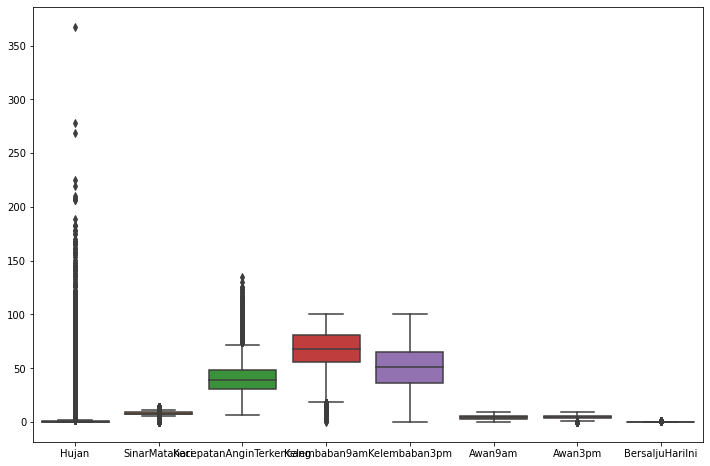

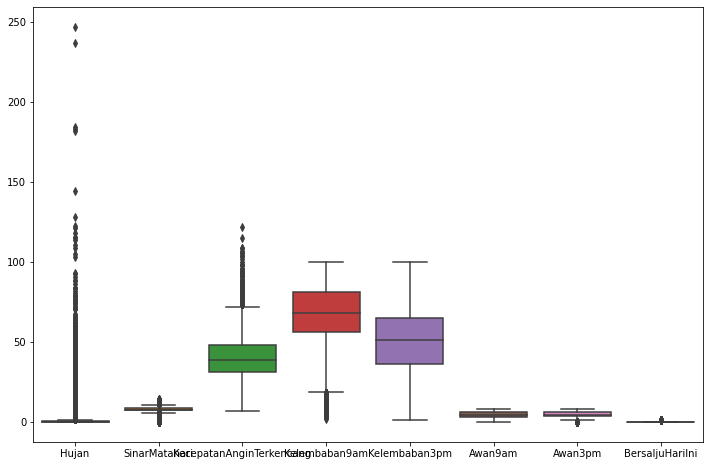

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=X_train)

plt.figure(figsize=(12,8))
sns.boxplot(data=X_test)

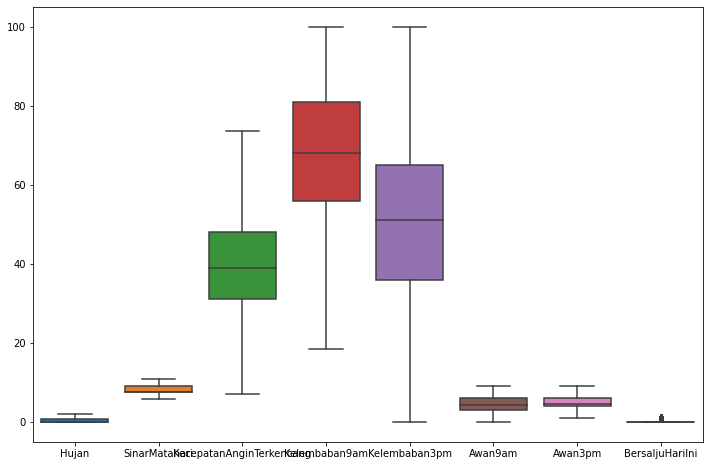

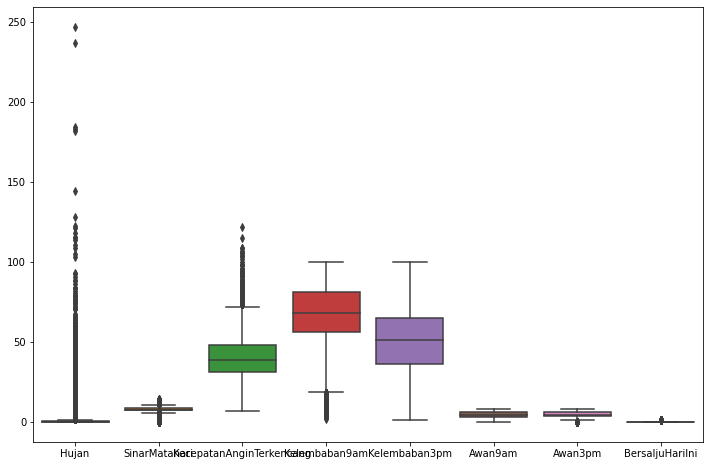

In [ ]:
for i in range(len(X_train.columns)-1):
  q1 = X_train.iloc[:, i].quantile(0.25)
  q3 = X_train.iloc[:, i].quantile(0.75)
  iqr = q3 - q1

  lb = q1 - (iqr * 1.5)
  ub = q3 + (iqr * 1.5)
  def apply(x):
    if x > ub:
      return ub
    elif x < lb:
      return lb
    else:
      return x

  X_train.iloc[:, i] = X_train.iloc[:, i].apply(apply)

plt.figure(figsize=(12,8))
sns.boxplot(data=X_train)

plt.figure(figsize=(12,8))
sns.boxplot(data=X_test)

## **SCALING**

In [ ]:
X_train_scal = StandardScaler().fit_transform(X_train)
# X_train_scal = MinMaxScaler().fit_transform(X_train)
display(X_train_scal)

X_test_scal = StandardScaler().fit_transform(X_test)
# X_test_scal = MinMaxScaler().fit_transform(X_test)
display(X_test_scal)

array([[-6.14747663e-01, -2.18304892e-01,  2.76126951e-01, ...,
         3.89458306e-16, -1.68108930e-02, -5.38622812e-01],
       [-6.14747663e-01,  1.45815514e+00,  1.06005860e+00, ...,
        -1.49462889e+00,  1.20020569e+00, -5.38622812e-01],
       [-6.14747663e-01,  1.79341750e+00, -2.72625205e-01, ...,
        -1.05613782e+00,  7.14124745e-01, -5.38622812e-01],
       ...,
       [ 1.40026716e+00, -2.18304892e-01, -5.86197866e-01, ...,
         3.89458306e-16, -1.68108930e-02,  1.85658679e+00],
       [-6.14747663e-01,  1.79341750e+00,  5.89699612e-01, ...,
        -1.93311996e+00, -1.71628000e+00, -5.38622812e-01],
       [ 1.90402087e+00, -2.18304892e-01, -4.29411535e-01, ...,
         3.89458306e-16, -1.68108930e-02,  1.85658679e+00]])

array([[-2.76708269e-01, -4.79602821e-01,  4.02058181e-01, ...,
        -1.78022679e-01,  1.18600240e+00, -5.36841753e-01],
       [-2.53392741e-01, -4.15355871e-15,  1.15356562e+00, ...,
         1.57991702e+00, -1.63823359e+00, -5.36841753e-01],
       [-2.76708269e-01,  9.59317599e-01, -5.74901495e-01, ...,
        -1.93596238e+00, -1.63823359e+00, -5.36841753e-01],
       ...,
       [-2.76708269e-01,  1.39099373e+00, -2.74298517e-01, ...,
        -1.49647746e+00, -1.63823359e+00, -5.36841753e-01],
       [-2.76708269e-01,  1.10320964e+00, -4.24600006e-01, ...,
         2.61462247e-01,  2.44590404e-01, -5.36841753e-01],
       [ 6.79228352e-01, -4.15355871e-15, -7.25202983e-01, ...,
         3.90341027e-16,  0.00000000e+00,  1.86274632e+00]])

# **MODELLING**

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train_scal, y_train)

y_pred = clf.predict(X_test_scal)

# **EVALUATION**

In [ ]:
print(f'{metrics.classification_report(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     12065
           1       0.44      0.48      0.46      3414

    accuracy                           0.75     15479
   macro avg       0.65      0.66      0.65     15479
weighted avg       0.76      0.75      0.76     15479



# **EXPERIMENT**

## **HYPERPARAMETER TUNING**

In [ ]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 5)
}

grid = GridSearchCV(
    clf,
    param_grid=param_dict,
    cv=10,
    verbose=1,
    n_jobs=-1
)
grid.fit(X_train_scal, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 1444 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2324 tasks      | elapsed:  3.1min


KeyboardInterrupt: ignored

In [ ]:
grid.best_estimator_

## **BUILD MODEL BASED ON BEST HYPERPARAMETER**

In [ ]:
t0 = time.time()

clf = grid.best_estimator_

clf.fit(X_train_scal, y_train)

y_pred = clf.predict(X_test_scal)

print(f'{metrics.classification_report(y_test, y_pred)}')
print(f'Time: {time.time()-t0}')

## **DECISION TREE VISUALIZATION**

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names = X_train.columns,
    class_names=['0','1']
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())